# 插值法
为解决预测类问题，通常使用插值法（分段线性插值、重心拉格朗日插值、埃尔米特插值）

### 核心思想
1. 当**数据量不足，需要补充**，且认定已有数据可信时，可以建立该模型预测需要补充的数据
2. 对于诸如 $y=e^{sinx}$ 等难以计算、比较复杂的函数，我们希望找到一个近似的替代函数（通常为多项式），用以**方便计算**y的粗略值。
    
    我们将原来的函数记作$f(x)$，将这种替代函数称为插值函数，分段线性插值中记作$p_n(x)$，拉格朗日插值中记作$L_k(x)$，埃尔米特插值中记作$G(x)$

### 原理证明

构造方程组：$\begin{cases}&a_{0}+a_{1}x_{0}+a_{2}x_{0}^{\ 2}+...+a_{n}x_{0}^{\ n}=y_{0}& \\&a_{0}+a_{1}x_{1}+a_{2}x_{1}^{\ 2}+...+a_{n}x_{1}^{\ n}=y_{1}& \\&.........&  \\&a_{0}+a_{1}x_{n}+a_{2}x_{n}^{\ 2}+...+a_{n}x_{n}^{\ n}=y_{n}& \end{cases}$

令: $A=\left[\begin{array}{cccc}1 & x_0 & \cdots & x_0^n \\ 1 & x_1 & \cdots & x_1^n \\ \vdots & \vdots & \cdots & \vdots \\ 1 & x_n & \cdots & x_n^n\end{array}\right]$ $X=\left[\begin{array}{c}a_0 \\ a_1 \\ \vdots \\ a_n\end{array}\right] \quad Y=\left[\begin{array}{c}y_0 \\ y_1 \\ \vdots \\ y_n\end{array}\right]$

方程组的矩阵形式如下: $\quad \boldsymbol{A X}=\boldsymbol{Y}$（4）

由于 $|\boldsymbol{A}|=\prod_{i=1}^n \prod_{j=0}^{n-1}\left(x_i-x_j\right) \neq 0$ 所以方程组 (4) 有唯一解。

从而 $L_n(x)=a_0+a_1 x+a_2 x^2+\ldots+a_n x^n$ 唯一存在.

证毕

## 分段插值
通常用多项式作为插值函数来逼近某一函数f(x)，但是插值多项式的**次数**是随着**插值节点的数目**而增加的，且次数高的插值多项式往往插值效果并不理想，会出现**龙格现象**，

即在插值函数$p_n(x)$的两端会发生极大的波动，导致预测的数据误差过大，插值效果很差。

为了解决龙格现象的出现，通常采用分段插值的方法：
1. 将插值区间划分为若干小段，在每一小段上使用低阶插值（线性插值）
2. 将各小段上的插值多项式拼接在一起，作为整个区间上的插值函数。（比如：如果使用线性插值，则将拼接成一条折线，用它来逼近函数f(x)）

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *

### 算法过程（线性插值）

将插值区间$[a,b]$根据$n+1$ 个互不相同的节点 $x_i(i=0,1, \ldots, n)$划分成n个小段（$a=x_0, b=x_n$），

在每一个小段$[{\bf x}_{\tt i-1},{\bf x}_{\tt i}]({\bf i}={\bf1},2,\cdot\cdot\cdot,{\bf n})$上，其分段线性插值的公式为：$\mathrm{p}({\bf x})={\bf y_{i}}+\frac{{\bf y_{i}}-{\bf y_{i-1}}}{{\bf x_{i}}-{\bf x_{i-1}}}({\bf x}-{\bf x_{i}})$

根据
$\mathbf{i}={\left\{\begin{array}{l l}{1}&{\mathbf{x}\leq\mathbf{x}_{0}}\\ {\mathbf{k}}&{\mathbf{x}_{\mathbf{k}-1}\lt \mathbf{x}\leq\mathbf{x}_{\mathbf{k}}，({\bf1}\le{\bf k}\le{\bf n})}\\ {\mathbf{n}}&{\mathbf{x}\gt \mathbf{x}_{\mathbf{n}}}\end{array}\right.}$选择插值节点，即当插值节点为$x_0​,x_1​,x_2​,⋯,x_{k−1}​,x_k​,⋯,x_n$​时，依次从左至右取出各节点。

1. 如果插值点x不超过节点$x_i$​（即在$[x_{i-1},x_i]$之间），则取节点$x_{i-1}$和 $x_i$​进行线性插值，否则，再检查x是否超过$x_{i+1},\cdots$，依次逐步检查。
2. 如果发现x不超过某个节点$x_n$​，则取它与前面一个节点$x_{n-1}$进行线性插值。
3. 如果x已超过$x_{n-1}$，则不论是否超过$x_n$​，插值节点均取$x_n$​和$x_{n-1}$（也就是一律当成是在$[x_{n-1},x_n]$）范围内取插值点。

In [17]:
def Segmented_linear_interpolate(xlist, ylist, x):
    # Judge which interval the element x should be in, and get value of i
    i = -1
    for t in xlist:
        if x >= t:
            i += 1
    # Linear Interploation formula
    if i == len(xlist)-1:  # (n = len(xlist)-1)
        return ylist[i]
    else:
        return ylist[i+1] + (ylist[i+1]-ylist[i])/(xlist[i+1]-xlist[i])*(x-xlist[i+1])


In [18]:
# Produce and Load Data
# Interpolation node: x_points and y_points
f = lambda x: 1/(1+25*x**2)
x_points = np.linspace(-1,1,11)
y_points = list(map(f,x_points))

# Calculate Interpolation in x
f = lambda t: Segmented_linear_interpolate(x_points,y_points,t)
x = np.linspace(-1,1,51)
y = list(map(f,x))


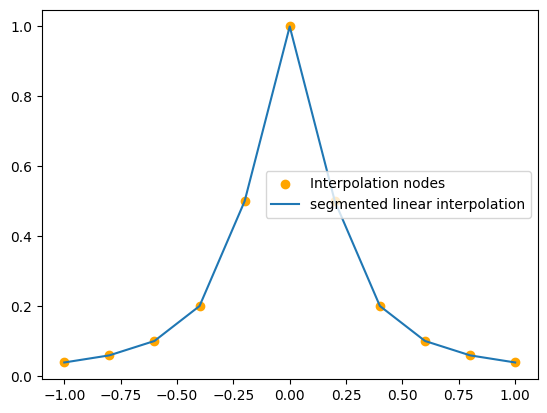

In [19]:
# matplotlib plotting
plt.figure("segmented linear interpolation")
plt.scatter(x_points,y_points,color = "orange")
plt.plot(x,y)
plt.legend(["Interpolation nodes","segmented linear interpolation"])
plt.show()

## 拉格朗日插值

对某个多项式函数，已知有给定的k + 1个取值点：$(x_{0},y_{0}),\cdot\cdot\cdot,(x_{k},y_{k})$ ，

能找到$k+1$个**拉格朗日基本多项式**$\ell _{j}(x)$，或称为**插值基函数**，它的特点是：在$x_{j}$上取值为1，在其它的点$x_{i}(\,i\neq j)$上取值为0。

因此，**拉格朗日插值多项式**$L_k(x)$就是这$k+1$个插值基函数$\ell _{j}(x)$分别与$y_{j}$相乘再依次相加

（因为这样得到的多项式能通过所有取值点）

### 算法过程

对于给定$k+1$个取值点：$(x_{0},y_{0}),\cdot\cdot\cdot,(x_{k},y_{k})$ ，

1. 先算$k+1$个**插值基函数**，表达式：$\ell_{j}(x)=\prod_{i=0,i\neq j}^{k}{\frac{x-x_{i}}{x_{j}-x_{i}}}={\frac{(x-x_{0})}{(x_{j}-x_{0})}}\cdots{\frac{(x-x_{j-1})}{(x_{j}-x_{j-1})}}{\frac{(x-x_{j+1})}{(x_{j}-x_{j+1})}}\cdots{\frac{(x-x_{k})}{(x_{j}-x_{k})}}.$
2. 再算**拉格朗日插值多项式**，表达式：$L_k(x)=\sum_{j=0}^{k}y_{j}\ell_{j}(x)$

    $k+1$个取值点得到的拉格朗日多项式为$k$次

### 改进
插值点增加，使得拉格朗日插值多项式变为高次，容易产生龙格现象。

采用重心拉格朗日插值法，进行改进：

定义重心权：$w_{j}={\frac {1}{\prod _{{i=0,i\neq j}}^{k}(x_{j}-x_{i})}}$

则可将**拉格朗日基本多项式**重新写为：$\ell _{j}(x)=\ell (x){\frac {w_{j}}{x-x_{j}}}$

于是拉格朗日插值多项式变为(第一型)：$L(x)=\ell (x)\sum _{{j=0}}^{k}{\frac {w_{j}}{x-x_{j}}}y_{j}\ \ \  (1)$

再将以上的拉格朗日插值多项式用来对函数$g(x)\equiv 1$插值，可以得到：$\forall x,\,g(x)=\ell (x)\sum _{{j=0}}^{k}{\frac {w_{j}}{x-x_{j}}}$

因为$g(x)\equiv 1$是一个多项式，因此，将L(x)除以g(x)后可得到第二型：$L(x)={\frac {\sum _{{j=0}}^{k}{\frac {w_{j}}{x-x_{j}}}y_{j}}{\sum _{{j=0}}^{k}{\frac {w_{j}}{x-x_{j}}}}}\ \ \  (2)$

即是真正的重心拉格朗日插值公式。

In [54]:
# 重心权
def w_j(x_data, j):
    wj = 1
    for i in range(len(x_data)):
        if(i != j):
            wj *= (x_data[j]-x_data[i])
    return 1/wj

# Lagrangian interpolation polynomial
def Lagrangian_interpolation_polynomial_L(x_data, y_data, x):
    Numerator, Denominator = 0, 0
    for j in range(len(x_data)):
        if x==x_data[j]:
            return y_data[j]
        wj = w_j(x_data, j)
        Numerator += y_data[j]*wj/(x-x_data[j])
        Denominator += wj/(x-x_data[j])
    return Numerator/Denominator


In [55]:
# Load Data
x_points = [1, 2, 3, 4]
y_points = [4, 8, 6, 7]

# Lagrange Interpolation, 4 DOTs:
f = lambda t: Lagrangian_interpolation_polynomial_L(x_points, y_points, t)
x = np.arange(0, 5, 0.2)  # (0, 4.2, 0.2)
y = list(map(f,x))


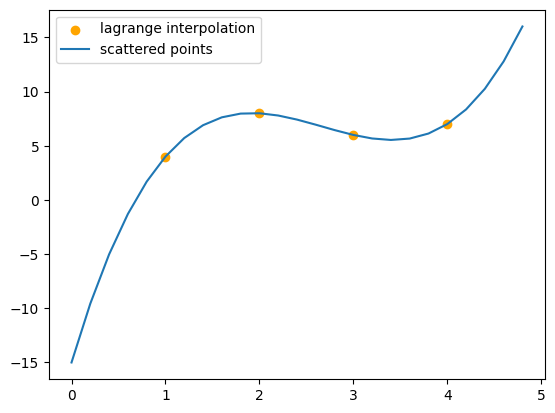

In [56]:
# matplotlib plotting
plt.figure("Lagrange Interpolation Dot 4")
plt.scatter(x_points,y_points,color = "orange")
plt.plot(x, y)
plt.legend(["lagrange interpolation","scattered points"])
plt.show() 

## 埃尔米特插值
保持插值曲线在节点处有切线（光滑），使得插值函数和被插值函数的密合程度更好。

不但要求在节点处上的函数值相等，而且还要求对应的导数值也相等，甚至要求高阶导数也相等，满足这种要求的插值多项式就是“**埃尔米特插值多项式**”。

因为高次的埃尔米特插值多项式也会产生龙格现象，因此通常使用**分段三次埃尔米特多项式**

### 分段三次埃尔米特插值多项式
插值区间 $[a, b]$ 根据 $n+1$ 个互不相同的节点 $x_i(i=0,1, \ldots, n)$划分。

假定已知函数 $f(x)$ 在这 $n+1$ 个节点上满足 $f\left(x_i\right)=f_i$ 及 $f^{\prime}\left(x_i\right)=f_i^{\prime}(i=0,1,2, \ldots, n)$,

如果函数 $G(x)$ 的存在满足下列条件:

1.  $G(x)$ 在每个小区间上的多项式次数为 3;
2.  $G\left(x_i\right)=f\left(x_i\right), \quad G^{\prime}\left(x_i\right)=f^{\prime}\left(x_i\right), \quad i=(0,1, \ldots, n)$

就称 $G(x)$ 是 $f(x)$ 在 $n+1$ 个节点 $x_i$ 上的分段三次埃尔米特插值多项式。

公式：$\alpha_{k}(x)= \left(1 +2 \frac{x-x_k}{x_{k+1}-x_k}\right)\left(\frac{x-x_{k+1}}{x_k-x_{k+1}}\right)^2$，$\beta_{k}(x)=\left(x-x_k\right)\left(\frac{x-x_{k+1}}{x_k-x_{k+1}}\right)^2$

$G(x)=y_{k}\alpha_{k}(x)+y_{k+1}\alpha_{k+1}(x)+y_{k}^{\prime}\beta_{k}(x)+y_{k+1}^{\prime}\beta_{k+1}(x)$

$$
\begin{aligned}
=& \left(1 +2 \frac{x-x_k}{x_{k+1}-x_k}\right)\left(\frac{x-x_{k+1}}{x_k-x_{k+1}}\right)^2 y_k+\left(1+2 \frac{x-x_{k+1}}{x_k-x_{k+1}}\right)\left(\frac{x-x_k}{x_{k+1}-x_k}\right)^2 y_{k+1} \\
& +\left(x-x_k\right)\left(\frac{x-x_{k+1}}{x_k-x_{k+1}}\right)^2 y_k^{\prime}+\left(x-x_{k+1}\right)\left(\frac{x-x_k}{x_{k+1}-x_k}\right)^2 y_{k+1}^{\prime}
\end{aligned}
$$

### 对公式的解释
$G(x)=y_{k}\alpha_{k}(x)+y_{k+1}\alpha_{k+1}(x)+y_{k}^{\prime}\beta_{k}(x)+y_{k+1}^{\prime}\beta_{k+1}(x)$

其中，$\alpha_{k}(x)、\beta_{k}(x)$ 为三次多项式，满足：

$\left\{\begin{array} { l } { \alpha _ { k } ( x _ { k } ) = 1 } \\{ \alpha _ { k } ( x _ { k+1 } ) = 0 } \\{ \alpha _ { k } ^ { \prime } ( x _ { k } ) = 0 } \\{ \alpha _ { k } ^ { \prime } ( x _ { k+1 } ) = 0 }\end{array} \quad \left\{\begin{array} { l } { \alpha _ { k+1 } ( x _ { k } ) = 0 } \\{ \alpha _ { k+1 } ( x _ { k+1 } ) = 1 } \\{ \alpha _ { k+1 } ^ { \prime } ( x _ { k } ) = 0 } \\{ \alpha _ { k+1 } ^ { \prime } ( x _ { k+1 } ) = 0 }\end{array} \quad \left\{\begin{array} { l } { \beta _ { k } ( x _ { k } ) = 0 } \\{ \beta _ { k } ( x _ { k+1 } ) = 0 } \\{ \beta _ { k } ^ { \prime } ( x _ { k } ) = 1 } \\{ \beta _ { k } ^ { \prime } ( x _ { k+1 } ) = 0 }\end{array} \quad \left\{\begin{array}{l}\beta_{ k+1 }\left(x_{ k } \right)=0 \\\beta_{ k+1 }\left(x_{ k+1 }\right)=0 \\\beta_{ k+1 }^{\prime}\left(x_{ k } \right)=0 \\\beta_{ k+1 }^{\prime}\left(x_{ k+1 }\right)=1\end{array}\right.\right.\right.\right.$

注意到，上式每一行、每一列都只有一项等于1，这就保证了$y_{k},y_{k+1}$及它们的导数都插入到了$G(x)$中。

比如，当$x=x_k$，并对$G(x)$等式两边求导以后，得到：

$G_k(x_k)^{\prime}=y_{k}^{\prime}\beta_{k}(x_k)^{\prime} = y_{k}^{\prime} $

### 算法流程
1. 计算$\alpha_{k}(x)、\beta_{k}(x)$、$\alpha_{k+1}(x)、\beta_{k+1}(x)$四个多项式的值，
2. 计算$G_k(x)=y_{k}\alpha_{k}(x)+y_{k+1}\alpha_{k+1}(x)+y_{k}^{\prime}\beta_{k}(x)+y_{k+1}^{\prime}\beta_{k+1}(x)$的值

In [63]:

def Segmented_3rd_Hermite_Interpolation(xlist, ylist, dflist, x):
    def alpha0(x): return ((x-xlist[i+1])/(xlist[i]-xlist[i+1]))**2 * (2*(x-xlist[i])/(xlist[i+1]-xlist[i])+1)
    def alpha1(x): return ((x-xlist[i])/(xlist[i+1]-xlist[i]))**2 * (2*(x-xlist[i+1])/(xlist[i]-xlist[i+1])+1)
    def beta0(x): return ((x-xlist[i+1])/(xlist[i]-xlist[i+1]))**2 * (x-xlist[i])
    def beta1(x): return ((x-xlist[i])/(xlist[i+1]-xlist[i]))**2 * (x-xlist[i+1])
    
    # Judge which interval the element x should be in, and get value of i
    i = -1
    for t in xlist:
        if x >= t:
            i += 1
    if i == len(xlist)-1:
        return ylist[i]
    # Calculate Hermite Interpolation
    G = alpha0(x)*ylist[i] + alpha1(x)*ylist[i+1] + beta0(x)*dflist[i] + beta1(x)*dflist[i+1]
    return G


In [64]:
# Produce and Load Data
# Define in sympy type, f: original function; df: derivative of the function
x = symbols('x')
f = 1/(1+25*x**2)
df = diff(f, x)
def dfx(x): return eval(str(df))
def fx(x): return eval(str(f))
x_points = np.linspace(-1, 1, 11)
y_points = list(map(fx, x_points))
df_points = list(map(dfx, x_points))


def f(x): return Segmented_3rd_Hermite_Interpolation(x_points, y_points, df_points, x)
x = np.linspace(-1, 1, 71)
y = list(map(f, x))

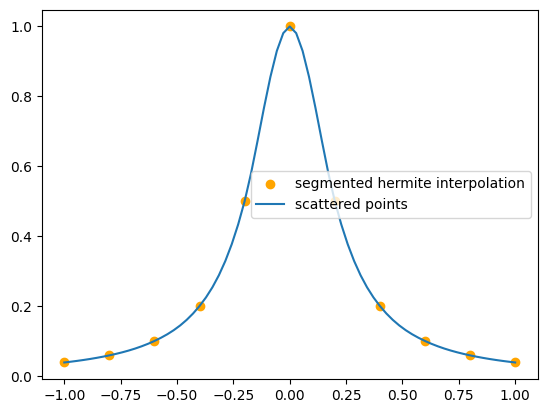

In [65]:
# matplotlib plotting
plt.figure("segmented hermite interpolation")
plt.scatter(x_points, y_points, color="orange")
plt.plot(x, y)
plt.legend(["segmented hermite interpolation", "scattered points"])
plt.show()
